<a href="https://colab.research.google.com/github/dawg-at-irya/error-propagation/blob/main/error-propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error propagation

### Here are three typical situations requiring error propagation:


1.   The mass of a binary system is estimated to be $4.5\pm 1.2$ M$_\odot$. The mass of the primary is independently estimated to be $3.1\pm 0.8$ M$_\odot$. Assuming that both uncertainties are due to Gaussian random noise, what is the secondary mass and its associated uncertainty?

2.   A faint source is measured to have a magnitude 21.006 mag in the 2MASS $J$ band. The uncertainty in this measurement is 0.512/2.406/4.001 mag. Assuming that the uncertainty is due to Gaussian random noise, what is the corresponding $J$-band flux and its uncertainty?

3.   The Chandrasekhar-Fermi method (Chandrasekhar & Fermi 1953) relates the plane-of-sky field strength to the number density and the dispersions in velocity (km s$^{-1}$) and polarisation angle ($^\circ$):<br><br>
$B_{\rm pos}\approx 9.3\displaystyle{\sqrt{n(\textrm{H}_2)}\ \Delta v\over \langle\sigma_\theta\rangle}$ $\mu$G<br><br>
Given $\Delta v=3.12\pm 0.73$ km s$^{-1}$, $\langle\sigma_\theta\rangle=(4.0\pm 0.3)^\circ$, and $n(\textrm{H}_2)=8.3\pm 6.6 \times 10^{6}$ cm$^{-3}$, find $B_{\rm pos}$ and its uncertainty, assuming that all provided uncertainties are Gaussian.

In this notebook, we will discuss the first two situations.

# Problem 1: the uncertainty of the sum/difference of two Gaussian variables.

This problem is the easiest to solve, and its solution does not depend on the relative quality of the data (i.e., the relative uncertainty).<br>

In frequentist statistics, the binary system has a single "true mass" which is known only to Nature. Repeated measurements result in differing estimates of this true mass because the observations are noisy:<br>
$m_{\rm obs} = m_{\rm true} + \epsilon$<br>
If the noise is random, then its long-term average is zero. Gaussian random noise means that the values of $\epsilon$ are drawn from a Gaussian distribution. This also means that repeated observations will result in a Gaussian distribution of $m_{\rm obs}$ around $m_{\rm true}$ with a standard deviation equal to the standard deviation of $\epsilon$.

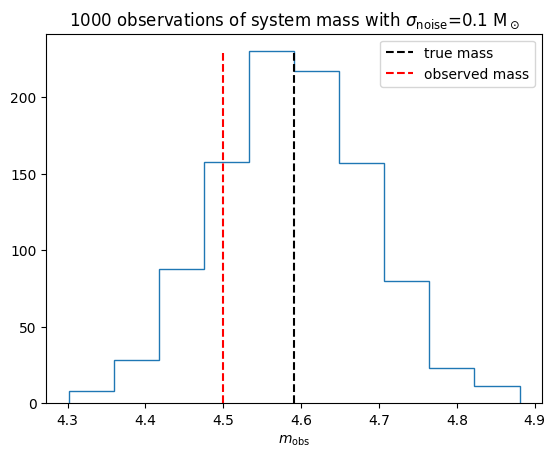

In [ ]:
import matplotlib.pyplot as plt
m_true = 4.591
m_obs = 4.50
sig_eps = 0.1
np.random.seed(1001) # reproducibility
m_samp = norm.rvs(loc=m_true, scale=sig_eps, size=1000)

c = plt.hist(m_samp, histtype='step')
plt.plot([m_true, m_true], [0, c[0].max()], 'k--', label='true mass')
plt.plot([m_obs, m_obs], [0, c[0].max()], 'r--', label=r'observed mass')
plt.ylim(0, c[0].max() * 1.05)
plt.title(r'1000 observations of system mass with $\sigma_{\rm noise}$=0.1 M$_\odot$')
plt.xlabel(r'$m_{\rm obs}$')
plt.legend(loc='best')
plt.show()

**The uncertainty in the sum/difference of two Gaussian variables is equal to the sum of uncertainties of the two variables in quadrature**<br>

If $X$ and $Y$ are normally distributed with standard deviations $\sigma_X$ and $\sigma_Y$, then $Z\equiv X\pm Y$ is also normally distributed, with a standard deviation equal to $\sigma_Z = \sqrt{\sigma_X^2 + \sigma_Y^2}$.<br>

Note that the uncertainties always ADD in quadrature regardless of whether the original variables are being added or subtracted.


In [ ]:
m_obs_tot, sig_m_tot = 4.5, 1.2
m_obs_pri, sig_m_pri = 3.1, 0.8
m_obs_sec = m_obs_tot - m_obs_pri
sig_m_sec = np.sqrt(sig_m_tot**2 + sig_m_pri**2)

print(f"The secondary mass is {np.round(m_obs_sec, decimals=2)}")
print(f"Its uncertainty is {np.round(sig_m_sec, decimals=2)}")


The secondary mass is 1.4
Its uncertainty is 1.44


### Yikes! In this case the data quality is low enough that negative secondary masses are, in principle, not entirely excluded.

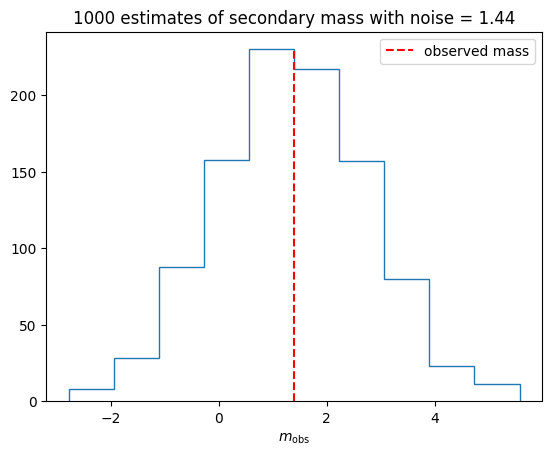

In [ ]:
np.random.seed(1001) # reproducibility
m_sec_samp = norm.rvs(loc=m_obs_sec, scale=sig_m_sec, size=1000)

c = plt.hist(m_sec_samp, histtype='step')
plt.plot([m_obs_sec, m_obs_sec], [0, c[0].max()], 'r--', label=r'observed mass')
plt.ylim(0, c[0].max() * 1.05)
plt.title(f'1000 estimates of secondary mass with noise = {np.round(sig_m_sec, decimals=2)}')
plt.xlabel(r'$m_{\rm obs}$')
plt.legend(loc='best')
plt.show()

### The solution to this problem hints at an issue with the assumption of Gaussain uncertainties: many physical quantities, such as stellar mass, are non-negative by definition.

### Observations for these quantities may be better modeled by an asymmetric distribution that tends to a Gaussian for higher data quality.

#Problem 2: nonlinear functions, error propagation, converting magnitudes to fluxes

This problem deals with one of the most frequently-used nonlinear transformations used in astronomy, that of conversions between magnitudes and fluxes.<br>

There are two important considerations when propagating uncertainties in this situation.


### 1.  **The distribution of the uncertainty in the nonlinear function is NOT Gaussian. In fact, it may not even be symmetric, in which case a single uncertainty value does not have the same meaning (in the $\pm$ sense).**


### 2.   **The method of computing the uncertainty typically involves assuming that the function is linear. For nonlinear functions, one needs to check whether this assumption will still produce an accurate uncertainty estimate.**



### As an example, let's consider the transformation $y = \log_{10}{x}$. Let $x$ be a Gaussian variable with mean value $x_{_0}$ and uncertainty $\sigma_x$.


<ipython-input-62-bbd97b08d8c8>:12: RuntimeWarning: invalid value encountered in log10
  y_samp = np.log10(x_samp)


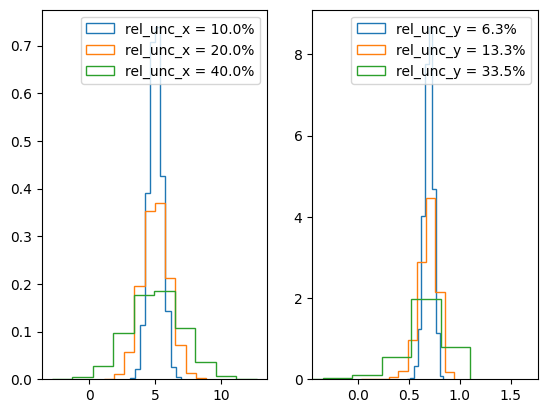

In [ ]:
x0 = 5
sigma_x = np.array([0.5, 1.0, 2.0])
fig, (ax1, ax2) = plt.subplots(1, 2)
for sig in sigma_x:
  rel_unc_x = np.round(100 * sig / x0, decimals=1)
  # print(f"The relative uncertainty in x is {rel_unc_x}%")

  np.random.seed(10001)
  x_samp = norm.rvs(loc=x0, scale=sig, size=10000)
  _ = ax1.hist(x_samp, histtype='step', label=f'rel_unc_x = {rel_unc_x}%', density=True)

  y_samp = np.log10(x_samp)
  y0 = np.nanmean(y_samp)
  sigma_y = np.nanstd(y_samp)
  rel_unc_y = np.round(100 * sigma_y / y0, decimals=1)
  # print(f"The mean value of y is {np.round(y0, decimals=1)}")
  # print(f"The relative uncertainty estimated for y is {rel_unc_y}%")

  _ = ax2.hist(y_samp, histtype='step', label=f'rel_unc_y = {rel_unc_y}%', density=True)

ax1.legend(loc='best')
ax2.legend(loc='best')
_ = ax2.set_xlim(y0 - 5 * sigma_y, y0 + 5 * sigma_y)

>>Notice
>>1.  The distribution of $x$ is always Gaussian, but its spread increases until it eventually samples negative values.
>>2.  The distribution of $\log_{10}{x}$ deviates from symmetry/Gaussianity as the relative uncertainty in $x$ increases. The distribution is skewed towards smaller values.
>>3.  Negative values for $x$ produce invalid values of $\log_{10}{x}$, which are not represented in the second plot. However, these NaNs will result in NaN means and standard deviations unless filtered out.

### Error propagation using the first-order Taylor approximation


>>The typical procedure for error propagation for functions of a variable is to use the Taylor Series:<br>
>>$\hspace{4ex}f(x_{_0} + \Delta x_{_0}) - f(x_{_0}) \equiv \Delta f = \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x\ + \Bigg(\displaystyle{d^2f(x)\over dx^2}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^2\over 2!}\ + \Bigg(\displaystyle{d^3f(x)\over dx^3}\Bigg)_{_{x_{_0}}}\ \displaystyle{(\Delta x)^3\over 3!}\ + \cdots$<br>
>>which is then truncated to first order:<br>
$\hspace{4ex} \Delta f \approx \Bigg(\displaystyle{df(x)\over dx}\Bigg)_{_{x_{_0}}}\ \Delta x$<br>
>>The above expression is exact for linear functions, so it works when used for linear combinations, such as for Problem 1 (using partial derivatives w.r.t. each variable).<br>
>>For nonlinear functions, the validity of the approximation depends on the magnitude of $\Delta x$.<br>

### Error propagation for the product or quotient of two variables

>>> If $X$ and $Y$ are two normally distributed variables and $Z\equiv X * Y$, what is the error in $Z$ w.r.t. the errors in $X$ and $Y$?<br><br>
>>> The "standard" method involves transforming to log-space, so that we end up with a sum:<br>
$\xi \equiv \ln{X}; \eta \equiv \ln{Y}; \zeta \equiv \xi + \eta$<br><br>
{\bf Assuming that the new variables are also normally distributed,}<br>
$\sigma_\zeta = \sqrt{\sigma_\xi^2 + \sigma_\eta^2}$<br>
We then transform this back to the original variables using the first-order Taylor approximation<br>
$\displaystyle{\sigma_Z\over Z} = \sqrt{(\displaystyle{\sigma_X\over X})^2 + (\displaystyle{\sigma_Y\over Y})^2}$<br><br>
That is, we compute the relative uncertainty in $Z$ by adding the relative uncertainties of $X$ and $Y$ in quadrature.

### Notice that this result depends on the assumption that the logarithm of a Gaussian variable is also normally distributed. We saw in the above problem that this is NOT TRUE if the relative uncertainties in the source variables are not small.

### More meaningful error estimate for asymmetric distributions/nonlinear functions: Monte Carlo + equal-tailed intervals.<br>

For asymmetric functions, the mean, median, and mode do not coincide. In addition, the standard deviation is no longer an intuitive measure of the spread around the typical value. We can compute a 68% interval and use its bounds as the left and right uncertainties instead.<br>

A 68% **equal-tailed confidence/credible interval** is such that it **rejects 16% probability on either side of it**. Such an interval will **always include the median (which is the location to either side of which there is 50% of the probability mass)**, but there's no guarantee that it will include the mean or mode (especially for highly asymmetric functions).

It therefore makes sense to quote the 16th, 50th, and 84th percentiles for asymmetric distributions.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
x0 = 5.0
sigma_x = 2.0
np.random.seed(10001)
x_samp = norm.rvs(loc=x0, scale=sigma_x, size=10000)
y_samp = np.log10(x_samp)

y_mean = np.nanmean(y_samp)
y_std = np.nanstd(y_samp)
k = np.nonzero(x_samp > 0)[0]
p0, p1, p2 = np.percentile(y_samp[k], [16, 50, 84])


print(f"Mean: {y_mean}")
print(f"Median: {str(p[1])}")
print(f"68% equal-tailed interval: {np.round(p0, 2), np.round(p2, 2)}")
# print(r"${0}_{1}^{2}$".format(str(p[1]), str(p[0]-p[1]), str(p[2]-p[1])))
print(f"Therefore, quoted result: {np.round(p1, 2)} {np.round(p0-p1, 2), np.round(p2-p1, 2)}")

Mean: 0.6609076553715348
Median: 0.7
68% equal-tailed interval: (0.49, 0.85)
Therefore, quoted result: 0.7 (-0.21, 0.14)


### Converting magnitudes to fluxes
>> Some good news here! There's an easy analytical way to estimate errors for fluxes if the magnitudes are assumed to be normally distributed.<br><br>
>> ### If $X$ is normally distributed, $e^X$ has a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution).<br><br>

## If $X$ is Gaussian with mean $\mu$ and standard deviation $\sigma$, then<br>
> ## the MEDIAN of $Y=e^X$ is $e^\mu$.<br>
> ## the 68% range around the median is $e^{\mu\pm\sigma}$.<br>


### We can apply this to the transformation from magnitudes to fluxes!<br>
### If the magnitude is normally distributed with mean $m$ and uncertainty $\sigma_{\rm m}$, the median flux corresponding to this is $F_{\rm median} = F_{\rm zp} 10^{-m/\alpha}$, and the corresponding 68% interval is $F_{\rm median}\times 10^{\pm\sigma_{\rm m}/\alpha}$.

In [ ]:
import numpy as np
from scipy.stats import norm
!pip install astroquery
from astroquery.svo_fps import SvoFps

Aside: magnitude <--> flux conversion formulae<br><br>
$\hspace{4ex}F = F_{\rm zp} \times 10^{-m / \alpha}$<br>
$\hspace{4ex}m = -\alpha \times \log_{10}{\displaystyle{F \over F_{\rm zp}}}$,<br><br>
where $\alpha=100^{1/5}\approx 2.51189$. Most people/papers/introductory astro books use either 2.5 or 2.512.

The most automated way to retrieve information for a standard filter is to obtain it from an online resource, such as the Spanish Virtual Observatory's Filter Profile Service using a Python package such as astroquery:

In [ ]:
filter_list = SvoFps.get_filter_list(facility='2MASS')
fZP = filter_list['filterID' == '2MASS/2MASS.J']['ZeroPoint']

Why?<br>
1. reproducibility: if everyone uses the same resource, our results agree.
2. prevention of reduplication/reduction of effort: if everyone uses an existing resource, we spend less effort and our results agree.
3. scalability/automation: easily extended to large numbers of filters, or multiple iterations.


In [ ]:
alpha = 100**(1/5.0)
print(f"True value: {alpha}")
print(f"% error if using 2.5: {np.round(np.abs(2.5 - alpha) / alpha * 100, decimals=2)}")
print(f"% error if using 2.512: {np.round(np.abs(2.512 - alpha) / alpha * 100, decimals=3)}")

True value: 2.51188643150958
% error if using 2.5: 0.47
% error if using 2.512: 0.005


In [ ]:
m = 21.006
sigma_m = np.array([0.512, 2.406, 4.001])
F_median = fZP * 10**(-m / alpha)
for s in sigma_m:
  sigma_F_lo, sigma_F_hi = F_median * 10**(-s / alpha), F_median * 10**(s / alpha)
  sigma_F_standard = np.log(10.0) / alpha * s
  print(f"For sigma_m = {s} mag:")
  print(f"    68% interval: {sigma_F_lo, sigma_F_hi} mag.")
  print(f"    standard value: {sigma_F_standard} mag.")
